## Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2 import the dataset ?

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.3 How to see the size of your data?

In [3]:
heart.size

4242

### 1.4 How to view the statistical characteristics of the data?

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 How to see just one column?

In [5]:
heart['chol']

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64

### 1.6 How to check the column names?

In [6]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.7 Find the Numerical Features,Categorical Features, Alphanumeric Features?

In [7]:
##Numerical
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
##Categorical Features
heart.describe(include = 'object')
##NO CATEGORICAL FEATURES int this dataset

ValueError: No objects to concatenate

In [9]:
heart.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Change the column names?

In [10]:
#Change the sex(0,1)=(female,male)
heart['Encoded_sex'] = heart['sex'].replace({1: 'Male', 0:'Female'})
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Encoded_sex
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Female
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Male
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Male
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Male


## 1.8 Categorical vs. Quantitative

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

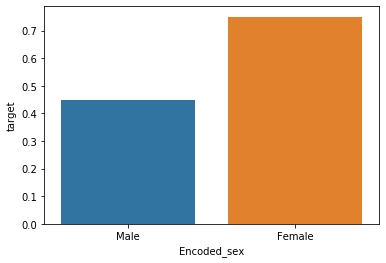

68.31683168316832
31.683168316831683


In [17]:
#draw a bar plot of target by sex
sns.barplot(x='Encoded_sex', y='target', data=heart, ci=0)
plt.show()
#print percentages of females vs. males Heart Disease
print((heart['Encoded_sex'].value_counts()['Male']/heart['Encoded_sex'].count())*100)
print((heart['Encoded_sex'].value_counts()['Female']/heart['Encoded_sex'].count())*100)

### Observation:



### 1.8b) Create Bar plot for checking the both target vs Sex. And your Observations?

ValueError: Could not interpret input 'Encoded_sex'

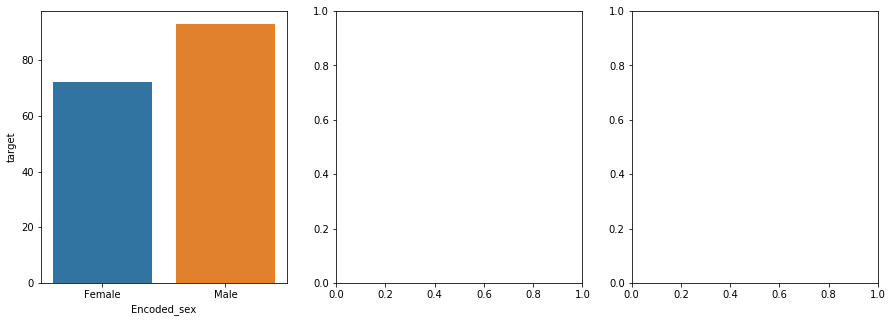

In [19]:
#create a subplot
fig, ax = plt.subplots(1,3,figsize=(15,5))

# create bar plot using groupby
a = heart.groupby(['Encoded_sex']).agg({'target':'sum'}).reset_index()
b = (heart.groupby(['Encoded_sex']).agg({'target':'count'})-heart.groupby(['sex']).agg({'target':'sum'})).reset_index()

# create count plot
sns.barplot(data=a,x='Encoded_sex',y='target',ax=ax[0])  #target 1
sns.barplot(data=b,x='Encoded_sex',y='target',ax=ax[1])  #target 0
pd.crosstab(heart['Encoded_sex'],heart['target']).plot(kind='bar',stacked=True,ax=ax[2])
plt.show()

#### Observation:
   

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not. And your Observations?

In [ ]:
# create subplot plot

# create bar plot using groupby

# create count plot


#### Observation:

  

### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'. And your Observations?

In [ ]:
# create subplot plot



# create violinplot plot using groupby



#### Observations:
   

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age . And your Observations?

In [ ]:
# create boxplot


### Observations: 
    

# 1.9 Categorical vs. Categorical

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex. And your Observations?

In [ ]:
#create crosstab



#### Observations:
    
    

# 1.10 Quantitative vs. Quantitative

### 1.10a) Create a scatter plot for showing age & st_depression. And your Observations?¶

Observation:
   

# 2. Seasonality and looking at trended data:


### 2. 1 Create a Seasonality and looking at trended data. And write your Observations?


In [ ]:
#Load the data = AirPassengers.csv



# Plot subplot 


Observations:


# THE END